<a href="https://colab.research.google.com/github/Avaress/ALFARIZA-ARYASATYA-UTS/blob/main/Screen_Time_and_App_Usage_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('Agg')  # Ensure matplotlib uses a non-interactive backend
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Switch backend if only plt is imported

# Ensure inline plotting on Kaggle
%matplotlib inline

# Other useful libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Set seaborn style
sns.set_style('whitegrid' )

In [ ]:
import io
import pandas as pd
from google.colab import files


uploaded = files.upload()


filename = list(uploaded.keys())[0]


df = pd.read_csv(io.BytesIO(uploaded[filename]))

print(df)

Saving screen_time_app_usage_dataset.csv to screen_time_app_usage_dataset.csv
      user_id                           date         app_name       category  \
0        1051  2024-01-01 00:00:00.000000000           Camera      Utilities   
1        1088  2024-01-01 00:43:41.673891297           Chrome      Utilities   
2        1052  2024-01-01 01:27:23.347782594          Spotify  Entertainment   
3        1028  2024-01-01 02:11:05.021673891      Google Maps      Utilities   
4        1034  2024-01-01 02:54:46.695565188        Instagram         Social   
...       ...                            ...              ...            ...   
2995     1086  2024-03-31 21:05:13.304434812           Camera      Utilities   
2996     1068  2024-03-31 21:48:54.978326109          Netflix  Entertainment   
2997     1081  2024-03-31 22:32:36.652217406  Microsoft Teams   Productivity   
2998     1038  2024-03-31 23:16:18.326108703         WhatsApp         Social   
2999     1089  2024-04-01 00:00:00.0000000

In [ ]:
# Convert the 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check for missing values in the 'date' column or any other columns
missing_vals = df.isnull().sum()
print('Missing values in each column:')
print(missing_vals)

# Drop rows with missing date values, since the date is critical for our analysis
df = df.dropna(subset=['date'])

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

# Convert boolean column if necessary
df['is_productive'] = df['is_productive'].astype(bool)

# Quick overview of the cleaned data
df.info()

Missing values in each column:
user_id                0
date                   0
app_name               0
category               0
screen_time_min        0
launches               0
interactions           0
is_productive          0
youtube_views       2858
youtube_likes       2858
youtube_comments    2858
extra_col_11           0
extra_col_12           0
extra_col_13           0
extra_col_14           0
extra_col_15           0
extra_col_16           0
extra_col_17           0
extra_col_18           0
extra_col_19           0
extra_col_20           0
extra_col_21           0
extra_col_22           0
extra_col_23           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           3000 non-null   int64         
 1   date              3000 non-null   datetime64[ns]
 2   app_name          3000 non-n

           user_id                 date  screen_time_min     launches  \
count  3000.000000                 3000      3000.000000  3000.000000   
mean   1049.800667  2024-02-15 12:00:00        29.902057     1.993333   
min    1000.000000  2024-01-01 00:00:00         0.010000     0.000000   
25%    1024.000000  2024-01-23 18:00:00         8.617500     1.000000   
50%    1049.000000  2024-02-15 12:00:00        20.585000     2.000000   
75%    1076.000000  2024-03-09 06:00:00        40.415000     3.000000   
max    1100.000000  2024-04-01 00:00:00       218.390000     9.000000   
std      29.406369                  NaN        30.561599     1.403547   

       interactions  youtube_views  youtube_likes  youtube_comments  \
count   3000.000000     142.000000     142.000000        142.000000   
mean       4.962000  256577.183099   14645.267606       2695.563380   
min        0.000000    1738.000000      69.000000          8.000000   
25%        3.000000  141490.000000    6548.250000        9

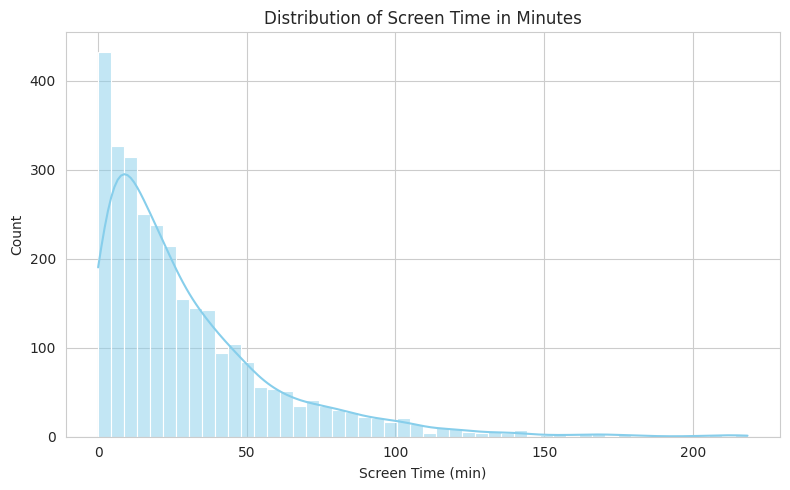

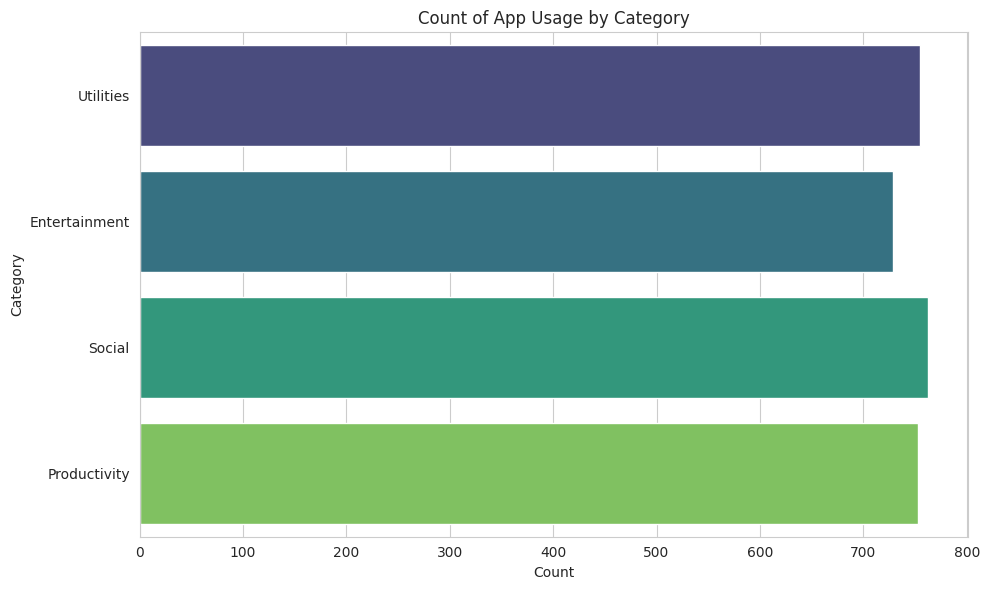

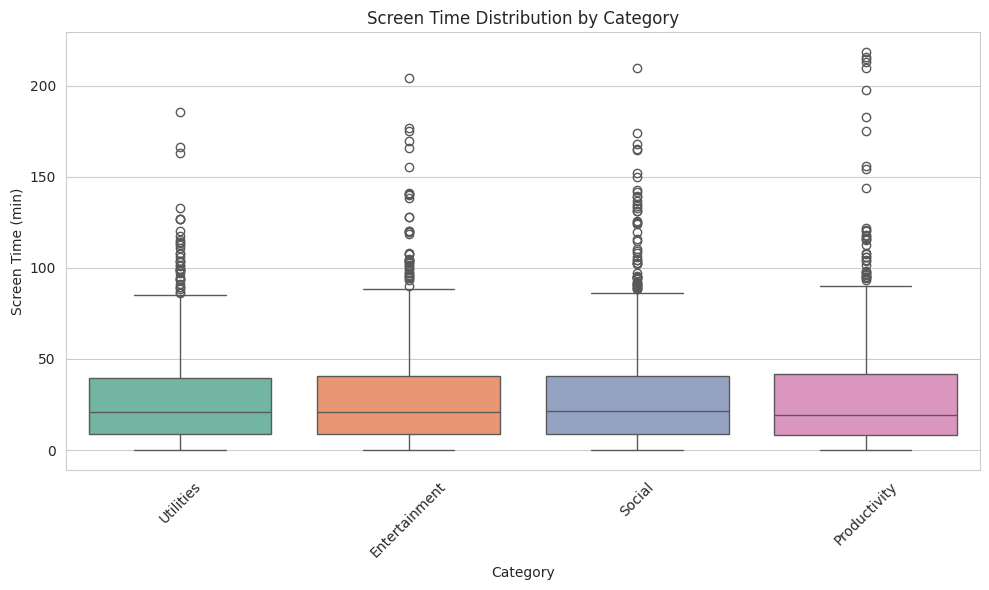

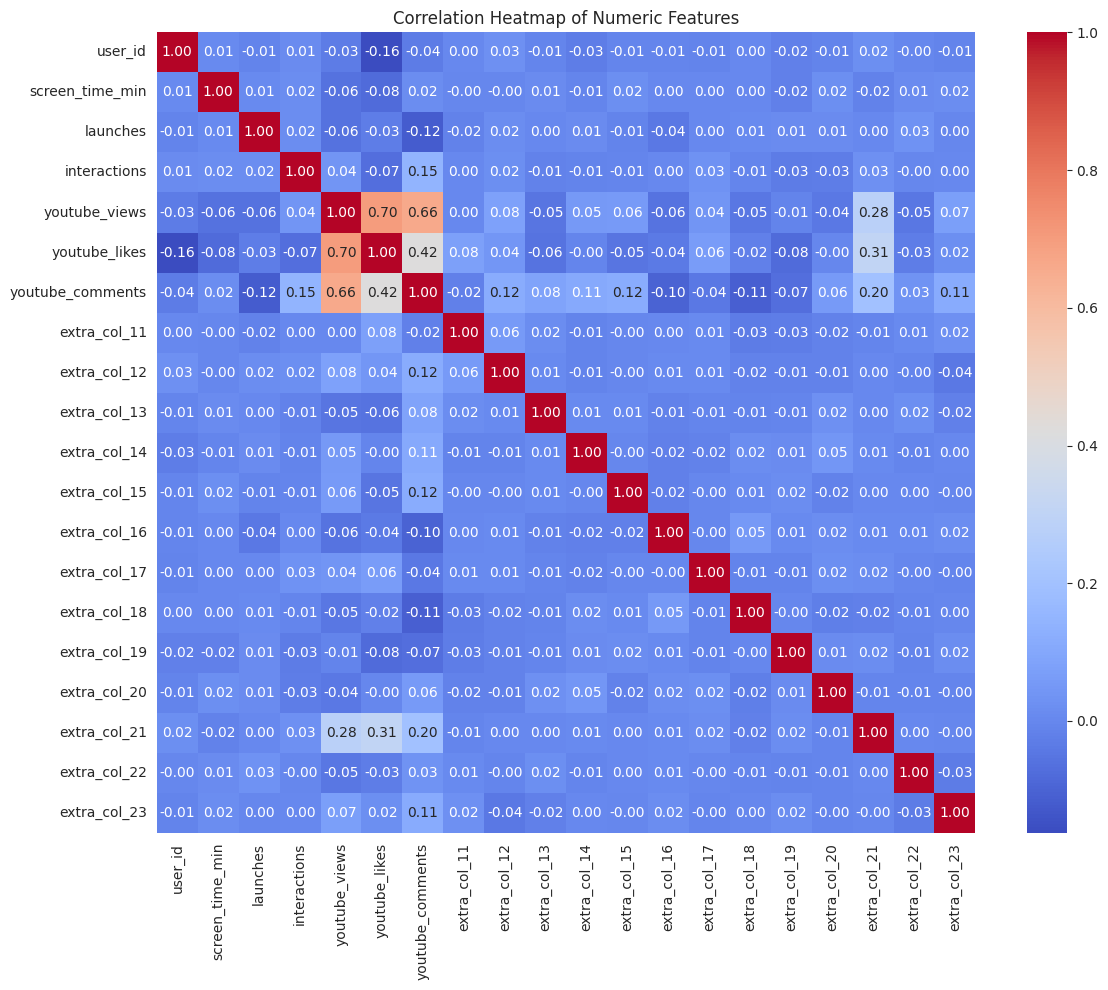

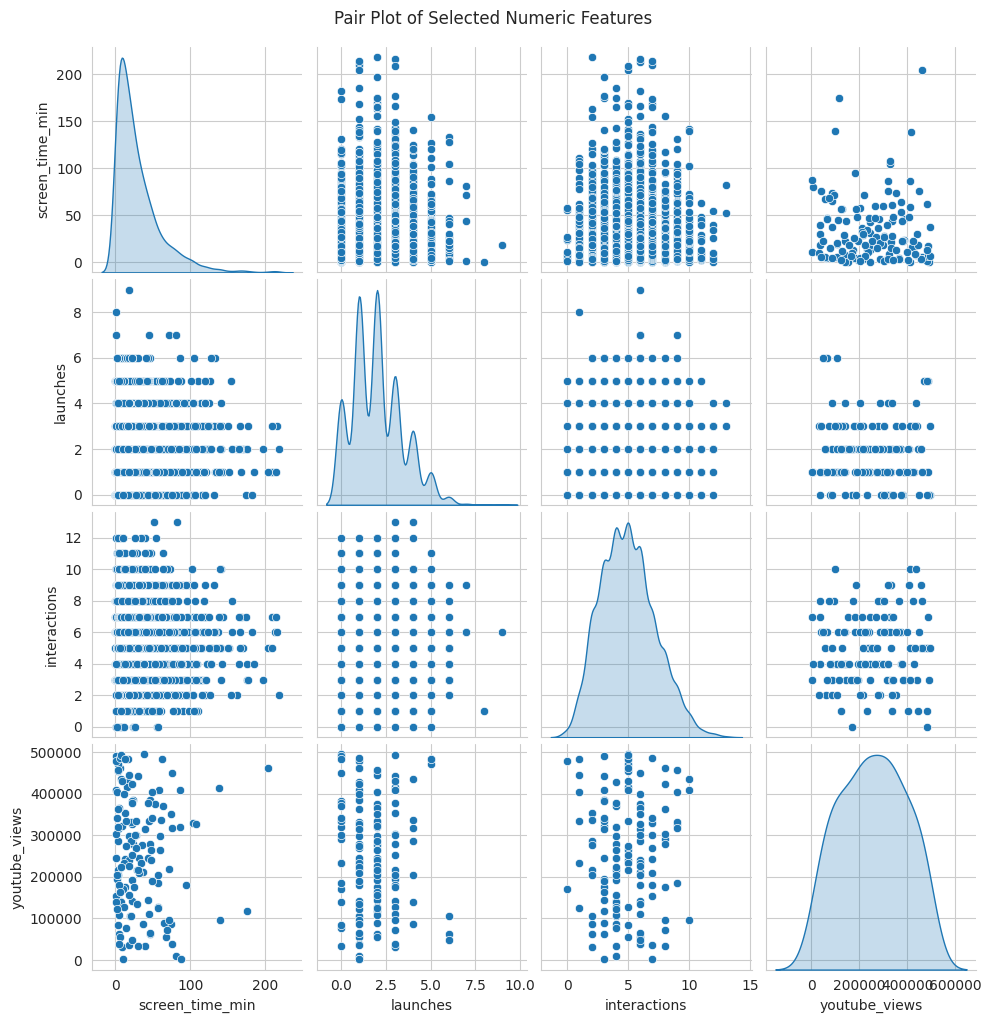

In [ ]:
# Basic descriptive statistics
print(df.describe())

# Plot a histogram for screen_time_min
plt.figure(figsize=(8, 5))
sns.histplot(df['screen_time_min'], kde=True, color='skyblue')
plt.title('Distribution of Screen Time in Minutes')
plt.xlabel('Screen Time (min)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Count plot of app usage by category
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df, palette='viridis')
plt.title('Count of App Usage by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='screen_time_min', data=df, palette='Set2')
plt.title('Screen Time Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Screen Time (min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns to plot a correlation heatmap.')


selected_cols = ['screen_time_min', 'launches', 'interactions', 'youtube_views']
if all(col in df.columns for col in selected_cols):
    sns.pairplot(df[selected_cols], diag_kind='kde')
    plt.suptitle('Pair Plot of Selected Numeric Features', y=1.02)
    plt.show()
else:
    print('Missing one or more required columns for pair plot.')

Prediction Accuracy: 1.0


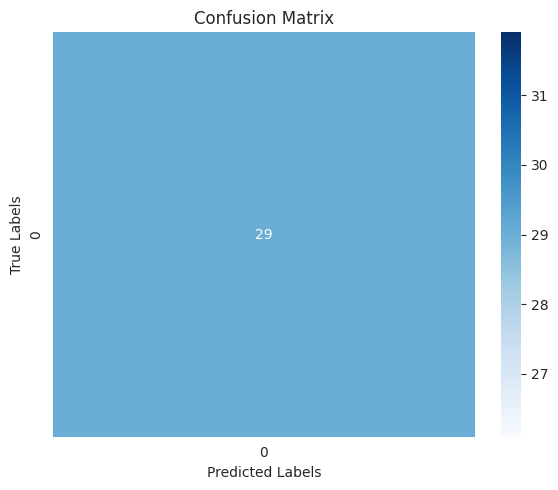

In [ ]:

model_df = df.copy()


features = ['screen_time_min', 'launches', 'interactions', 'youtube_views', 'youtube_likes', 'youtube_comments']

for col in df.columns:
    if col.startswith('extra_col_'):
        features.append(col)


le_app = LabelEncoder()
le_cat = LabelEncoder()

if model_df['app_name'].dtype == object:
    model_df['app_name_encoded'] = le_app.fit_transform(model_df['app_name'])
    features.append('app_name_encoded')

if model_df['category'].dtype == object:
    model_df['category_encoded'] = le_cat.fit_transform(model_df['category'])
    features.append('category_encoded')


model_df = model_df.dropna(subset=features + ['is_productive'])


X = model_df[features]
y = model_df['is_productive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Prediction Accuracy:', accuracy)


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()